# **Data Science and Business Analytics Internship TASK - 1** 

---
# **Exploratory Data Analysis - Terrorism**

# **Importing the necessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.animation as animate

# **Data Pre-Processing** or **EDA(Exploratory Data Analysis) Step - 1**

In [2]:
train_dat = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin1')   #Reading the dataset
train_dat.describe()   #To start with the EDA process and getting familiar with our dataset


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



eventid          iyear  ...       INT_MISC        INT_ANY
count  1.816910e+05  181691.000000  ...  181691.000000  181691.000000
mean   2.002705e+11    2002.638997  ...       0.090010      -3.945952
std    1.325957e+09      13.259430  ...       0.568457       4.691325
min    1.970000e+11    1970.000000  ...      -9.000000      -9.000000
25%    1.991021e+11    1991.000000  ...       0.000000      -9.000000
50%    2.009022e+11    2009.000000  ...       0.000000       0.000000
75%    2.014081e+11    2014.000000  ...       0.000000       0.000000
max    2.017123e+11    2017.000000  ...       1.000000       1.000000

[8 rows x 77 columns]

# **EDA Step - 2**

In [3]:
train_dat.head()   #First five observations of our dataset

eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0  197000000001   1970       7     2  ...        0         0       0      NaN
1  197000000002   1970       0     0  ...        1         1       1      NaN
2  197001000001   1970       1     0  ...       -9         1       1      NaN
3  197001000002   1970       1     0  ...       -9         1       1      NaN
4  197001000003   1970       1     0  ...       -9         1       1      NaN

[5 rows x 135 columns]

# **EDA Step - 3**

In [4]:
train_dat.columns   #To know the various attributes in our dataset

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

# **EDA Step - 4**

In [5]:
train_dat = train_dat[["iyear", "imonth", "iday","country", "country_txt", "region_txt", "city","success", "attacktype1_txt","nkill", "propvalue", "targtype1_txt","latitude","gname","longitude", "targsubtype1_txt","target1","weaptype1_txt", "weapdetail"]]

train_dat.rename(columns = {'iyear':'Year', "imonth":"Month","iday":"Day", "country":"Country_no",
                     "country_txt":"Country","region_txt":"Region","city":"City", "propvalue":"property_value",
                     "attacktype1_txt":"Attack_type", "targtype1_txt":"Target_type","gname":"group_name",
                     "targsubtype1_txt":"Target_sub_type", "target1":"Target", "nkill":"no_of_kills",
                     "weaptype1_txt":"Weapon_type", "weapdetail":"Weapon_detail"}, inplace = True) #Proper renaming for easier reuse of code

# **EDA Step - 4**

In [6]:
train_dat.shape   #To know the dimension of our dataset

(181691, 19)

# **EDA STEP - 5**

In [7]:
train_dat.isnull().sum()   #To display the null values for each attribute in our dataset

Year                    0
Month                   0
Day                     0
Country_no              0
Country                 0
Region                  0
City                  434
success                 0
Attack_type             0
no_of_kills         10313
property_value     142702
Target_type             0
latitude             4556
group_name              0
longitude            4557
Target_sub_type     10373
Target                636
Weapon_type             0
Weapon_detail       67670
dtype: int64

# **EDA STEP - 6**

In [8]:
train_dat["City"].fillna("Unknown", inplace = True)   #Filling 'Unknown' in place of Null values for the attribute "City"
train_dat["Target"].fillna("Unknown", inplace = True)   #Filling 'Unknown' in  place of Null values for the attribute "Target"
train_dat["property_value"].fillna(0, inplace = True)   #Filling '0' in  place of Null values for the attribute "property_value"
train_dat["no_of_kills"].fillna(0, inplace = True)   #Filling '0' in  place of Null values for the attribute "no_of_kills"

# **EDA Final Step**

In [9]:
train_dat.info()   #To be known about what type of data in each column we have

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             181691 non-null  int64  
 1   Month            181691 non-null  int64  
 2   Day              181691 non-null  int64  
 3   Country_no       181691 non-null  int64  
 4   Country          181691 non-null  object 
 5   Region           181691 non-null  object 
 6   City             181691 non-null  object 
 7   success          181691 non-null  int64  
 8   Attack_type      181691 non-null  object 
 9   no_of_kills      181691 non-null  float64
 10  property_value   181691 non-null  float64
 11  Target_type      181691 non-null  object 
 12  latitude         177135 non-null  float64
 13  group_name       181691 non-null  object 
 14  longitude        177134 non-null  float64
 15  Target_sub_type  171318 non-null  object 
 16  Target           181691 non-null  obje

# **Visualizations**





### **1. Interactive Scatterplot** **- Attack type in each region and year**

In [10]:
fig = px.scatter(train_dat, x="Year", y="Region", color="Attack_type",size="no_of_kills", hover_name="Country", log_x=True, size_max=60,title='Attack type in each region & year')   #Scatter plot for the data about attack type each year 
fig.show()

### **2. Bar Plot** **- Number of attacks per year**

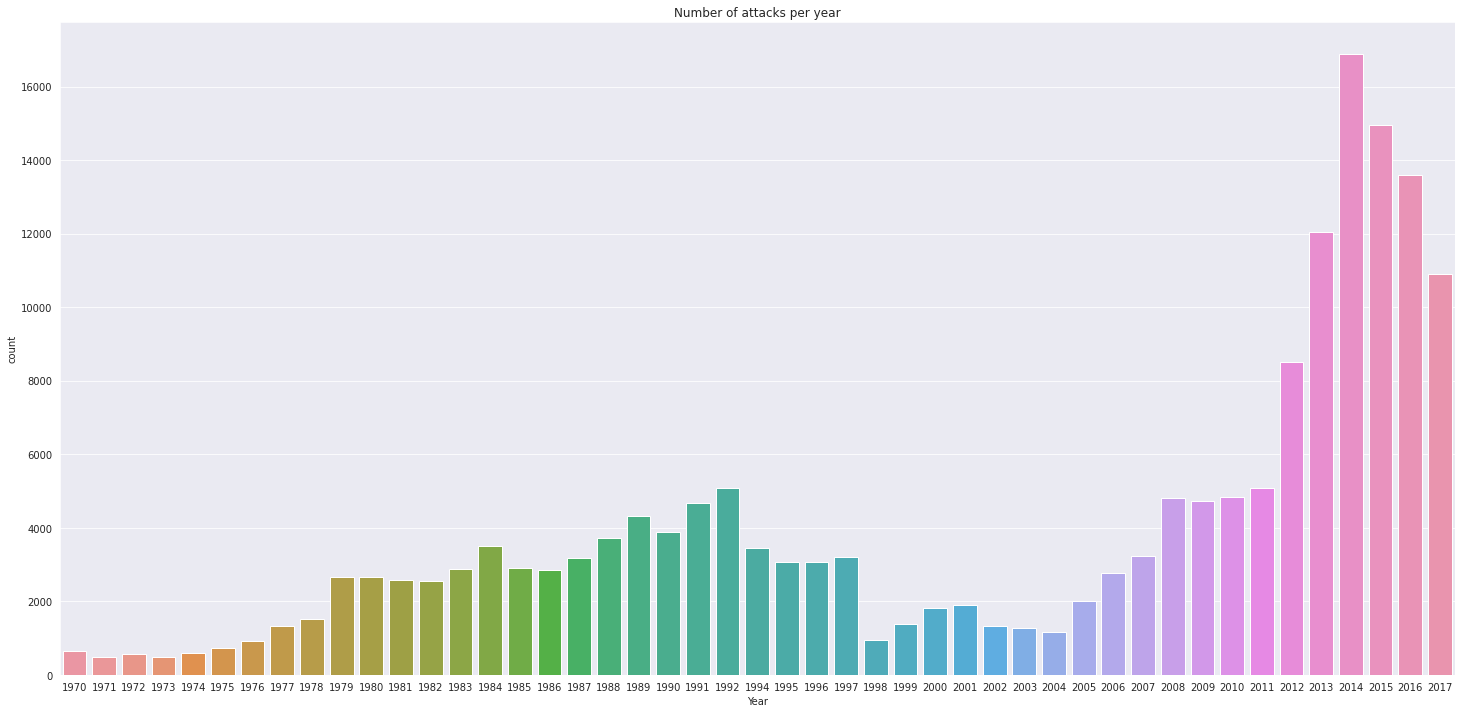

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,12))   #Increasing figure size
plt.title("Number of attacks per year")   #Title for the graph
_=sns.countplot(x ='Year', data = train_dat)

### **3. Bar Plot - Top 15 countries that are affected**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



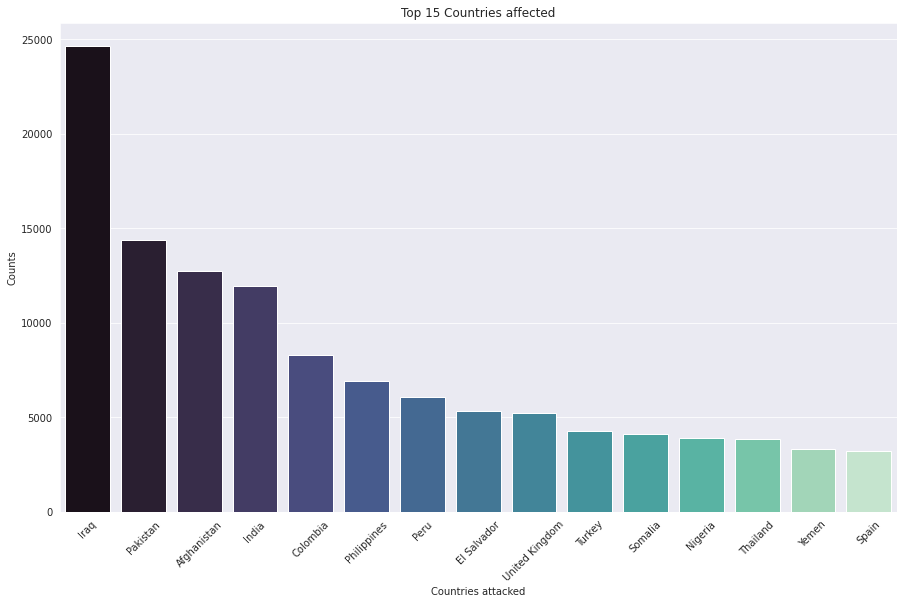

In [12]:
plt.figure(figsize=(15, 9))
sns.barplot(
    train_dat["Country"].value_counts()[:15].index,
    train_dat["Country"].value_counts()[:15].values,
    palette=("mako"),
)
plt.title("Top 15 Countries affected")
plt.xlabel("Countries attacked")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show();

### **4. Bar Plot - Weapon types used in attacks**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



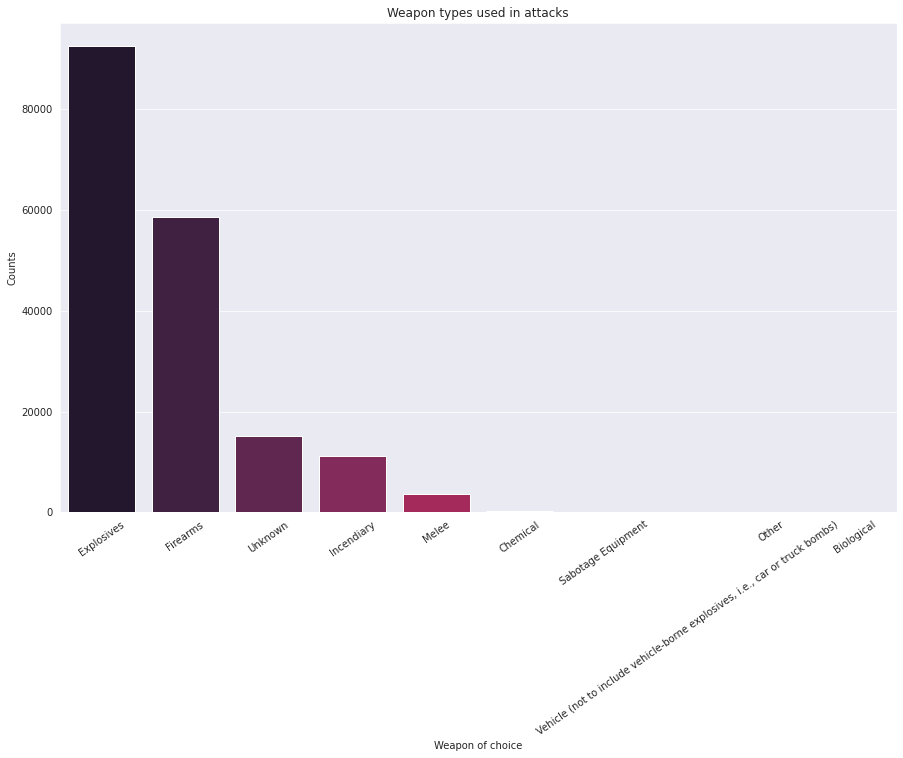

In [13]:
plt.figure(figsize=(15, 9))
sns.barplot(
    train_dat["Weapon_type"].value_counts()[:10].index,
    train_dat["Weapon_type"].value_counts()[:10].values,
    palette=("rocket"),
)
plt.title("Weapon types used in attacks")
plt.xlabel("Weapon of choice")
plt.ylabel("Counts")
plt.xticks(rotation=35)
plt.show();

# **Conclusion & Analyzed Information**

### **What I found:**
1. From the first visualization I found that, by 2020 'Hostage Taking' and 'Bombing/Explosion' was at its peak for the attack type used in most of the regions.
2. From the second visualization I could see that, 'Number of attacks' was the highest in the year '2014'.
3. From the third visualization it's clear that, country that is most affected from terrorism is 'Iraq'.
4. From the fourth visualization it could be said that, 'Explosives' were the most popular weapon among the terrorist groups for carrying out the attacks.

**Finally, I completed the EDA (Exploratory Data Analysis) on the Global Terrorism Dataset provided and the above mentioned points are my key findings for this particular dataset.**